# Implementation 3 - Simple linear regression

Here are some examples of code implementation for data preprocessing.<br>
Objectives: train a simple linear regression, make some predictions, evaluate the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

## Importing the data set

This data set is composed of records of money (in k€) invested in TV, radio and newspaper ads for specific products and the corresponding sales (in m$).

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


The **Unnamed** column should be the index of the DataFrame

In [4]:
data = pd.read_csv("Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Data inspection
### Correlations

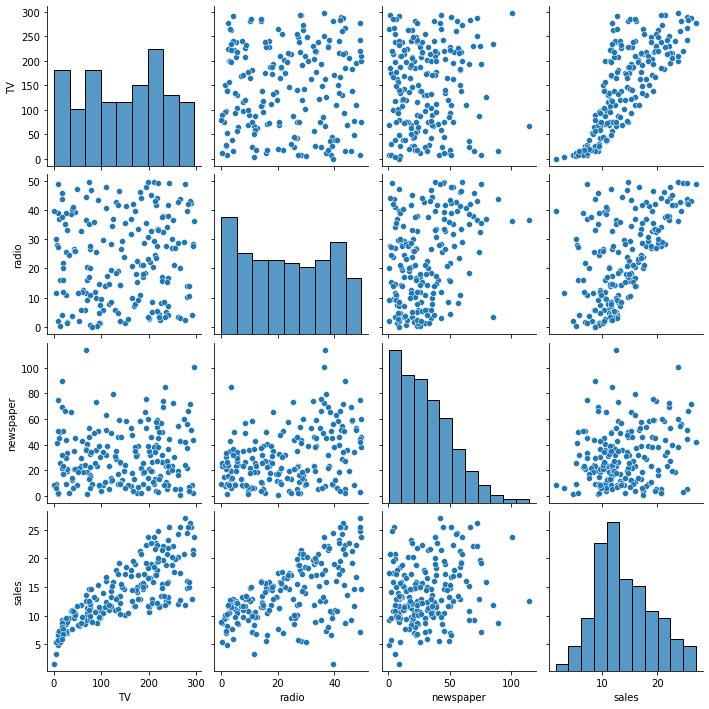

In [5]:
sns.pairplot(data)

In [6]:
correlation = data.corr()
correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


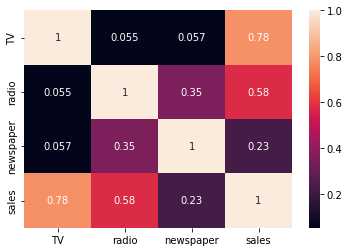

In [7]:
_ = sns.heatmap(correlation, annot=True)

### Sales vs TV ads

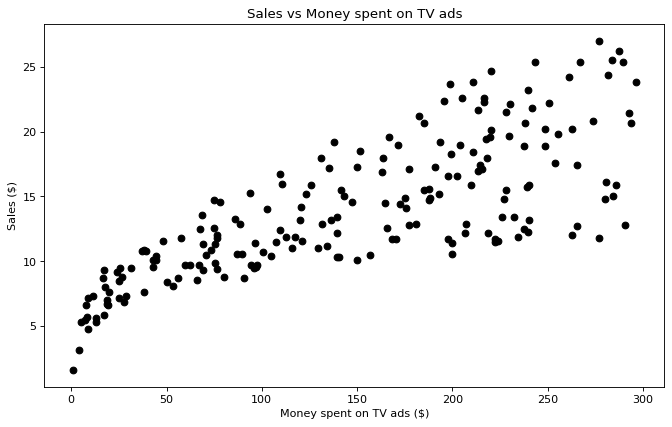

In [8]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.title("Sales vs Money spent on TV ads")
plt.show()

### Sales vs Newspaper ads 

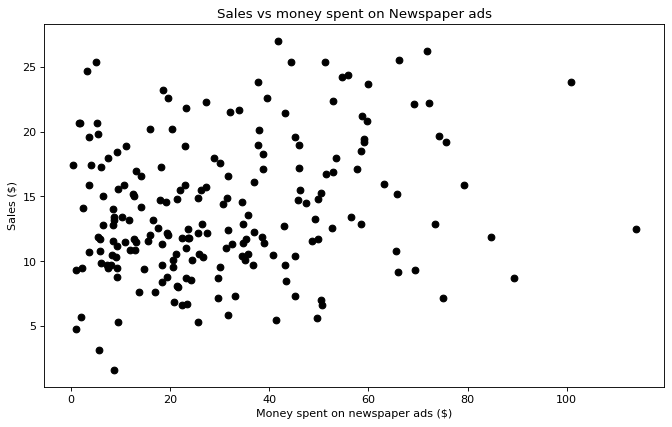

In [9]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['newspaper'], data['sales'], c='black')
plt.xlabel("Money spent on newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.title("Sales vs money spent on Newspaper ads")
plt.show()

## Simple linear regression

###  Select columns of interest

We notice from data inspection that 'sales' is especially correlated with 'TV'.<br>
In this section, we will consider the TV expenditures as the unique feature and the sales as the response.

### Check for missing data 

In [10]:
data[['TV', 'sales']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   sales   200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


### Data preparation

In [11]:
X = data[['TV']]
y = data['sales']
X.shape, y.shape

((200, 1), (200,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Linear regression fitting

Note that we do not scale the data set here (it is not necessary for a linear regression when there is only one feature).

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

We can check the parameters of the model (estimations of beta_0 and beta_1):

In [14]:
print(regressor.intercept_)

7.248909283005854


In [15]:
print(regressor.coef_)

[0.04614341]


### Making predictions

Now we can make predictions. Example: prediction of Sales for 100 $ spent on TV ads.

In [16]:
tv_ad_spending = 100
print(regressor.intercept_ + regressor.coef_[0] * tv_ad_spending)

11.863250036680354


In [17]:
print(regressor.predict([[100]]))

[11.86325004]


/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can also plot the prediction line.

/Users/zx/miniconda3/envs/FSAML/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


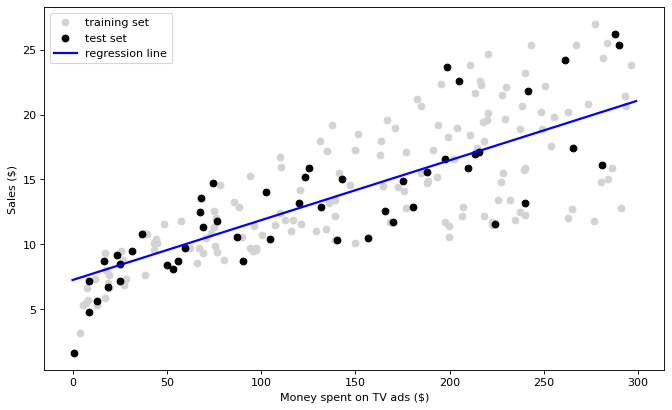

In [18]:
X_plot = np.arange(0,300,1).reshape(-1, 1)
y_plot = regressor.predict(X_plot)

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

### Model performance assessment

#### MSE, RMSE, MAE

In [19]:
y_pred = regressor.predict(X_test)

errors = (y_pred - y_test) # also known as residuals
rss = sum(errors ** 2)
mae = np.mean(abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

print(f"Residual sum of squares (RSS): {rss :.2f}")
print("-"*50)
print(f"Mean square error (MSE): {mse :.2f}")
print(f"Root mean square error (RMSE): {rmse :.2f}")
print(f"Mean absolute error (MAE): {mae :.2f}")

Residual sum of squares (RSS): 436.51
--------------------------------------------------
Mean square error (MSE): 8.73
Root mean square error (RMSE): 2.95
Mean absolute error (MAE): 2.30


In [20]:
from sklearn.metrics import r2_score,  explained_variance_score

print("Variance-score (coefficient of determination): R² = %.2f" % r2_score(y_test , y_pred))

Variance-score (coefficient of determination): R² = 0.69


<AxesSubplot:xlabel='TV', ylabel='residuals'>

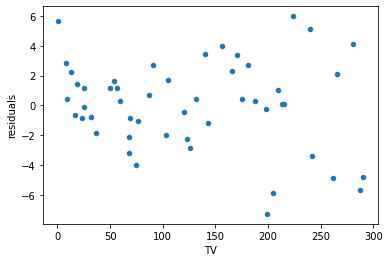

In [21]:
error_plot = X_test.copy()
error_plot['residuals'] = errors
error_plot.plot.scatter(x='TV', y='residuals')

In [22]:
X_test

,TV
19,69.2
171,50.0
108,90.4
99,289.7
178,170.2
183,56.2
6,8.7
147,240.1
13,23.8
153,197.6


In [23]:
errors

19    -0.857967
171    1.156080
108    2.720273
99    -4.783346
178    3.402517
183    1.142169
6      0.450357
147    5.127941
13    -0.852878
153   -0.233153
62    -4.893818
126    0.672614
181    3.974967
155    0.314641
81    -1.025734
8     -0.404653
34     2.104598
131    5.681210
38    -4.004178
75     0.095912
184   -5.680247
146    3.422829
46     0.428620
160    0.425996
61     1.617582
124   -2.270837
180    2.290258
186   -5.891692
123    5.985033
45    -0.092891
17    -2.122568
56    -7.273167
151    4.101364
112   -3.398229
23     2.258002
190    1.411791
130    0.299056
5      2.691637
84    -3.194882
107    1.202494
135   -1.848399
67    -0.797573
27    -1.157198
114    1.020568
169    0.088199
64    -2.012163
9      2.845743
76    -0.671267
119   -2.850864
144    1.675510
Name: sales, dtype: float64